# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

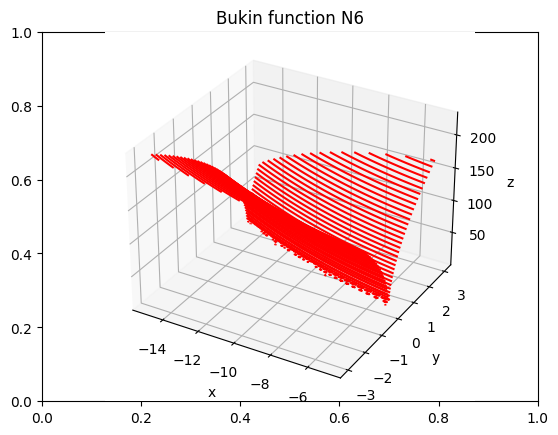

In [9]:
#Exercise 1

import matplotlib.pyplot as plt
import numpy as np
import math
import torch

def f(x, y):
    return 100 * np.sqrt(abs(y - 0.01*x*x)) + 0.01 * abs (x + 10)

x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig= plt.subplots()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, colors="red")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Bukin function N6')
plt.show()


In [140]:
#Exercise 2

#Start from a state
x = np.random.uniform(-15, -5)
y = np.random.uniform(-3, 3)

#Get neighbour
def get_neighbour(state, step_size=0.1):
    x, y = state
    new_x = np.random.normal(x, step_size)
    new_y = np.random.normal(y, step_size)
    return new_x, new_y

#Finding minimum
def hill_climbing():
    current_state = (x, y)
    current_value = f(x, y)
    for i in range(10000):
        neighbour = get_neighbour(current_state)
        neighbour_value = f(*neighbour)
        if neighbour_value < current_value:
            current_state = neighbour
            current_value = neighbour_value
    return current_state, current_value
    
best_state, best_value = hill_climbing()
print("Best state:", best_state)
print("Best value:", best_value)

Best state: (-7.130050411982733, 0.5083882893591543)
Best value: 0.3765584472224423


In [141]:
#Exercise 3

import numpy as np

def knapsack_fitness(solution, values, weights, max_weight):
    total_value = np.sum(solution * values)
    total_weight = np.sum(solution * weights)
    if total_weight > max_weight:
        return -1
    else:
        return total_value

#Begin with an empty string of n zeros
def get_random_state(n):
    return np.zeros(n, dtype=int)

#Find neighbour by switching 0s into 1s
def get_neighbor(state):
    n = len(state)
    i = np.random.randint(n)
    neighbor = np.copy(state)
    neighbor[i] = 1 - neighbor[i]
    return neighbor

def hill_climbing_knapsack(values, weights, max_weight):
    n = len(values)
    current_state = get_random_state(n)
    current_value = knapsack_fitness(current_state, values, weights, max_weight)
    for i in range(10000):
        neighbor = get_neighbor(current_state)
        neighbor_value = knapsack_fitness(neighbor, values, weights, max_weight)
        if neighbor_value > current_value:
            current_state = neighbor
            current_value = neighbor_value
    return current_state, current_value


values = np.array([10, 20, 30, 40, 50])
weights = np.array([1, 2, 3, 4, 5])
max_weight = 10

best_state, best_value = hill_climbing_knapsack(values, weights, max_weight)
print("Best state:", best_state)
print("Best value:", best_value)


Best state: [1 0 1 0 1]
Best value: 90


In [142]:
#Exercise 4

global_best_state = best_state
global_best_value = best_value

for i in range(10):
    values = np.array([10, 20, 30, 40, 50])
    weights = np.array([1, 2, 3, 4, 5])
    max_weight = 10

    best_state, best_value = hill_climbing_knapsack(values, weights, max_weight)
    if best_value>global_best_value:
        global_best_state = best_state
        global_best_value = best_value
        
print("Global best state:", global_best_state)
print("Global best value:", global_best_value)

Global best state: [1 1 1 1 0]
Global best value: 100
